In [161]:
# Nama : Muhammad Raka Candra Murti Sugiyanata
# NIM : 1202922003

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [162]:
data = pd.read_csv('../input/housedata/data.csv') # pd.read_csv = import data file nya dari dataset
dataset = data.copy()
dataset.head (10) # dataset.head (10) = jika ingin menampilkan 10 data teratas dari data frame
# tampilkan informasi data antara lain:
# jumlah kolom dan baris,
# nama kolom (Column), 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [163]:
# kita gunakan kolom yg berupa angka saja dan
# hilangkan/abaikan kolom dengan tipe nilai yg bukan angka (dtype=object)
dataset.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)

# tampilkan summary dari data.
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [164]:
# periksa apakah ada yang bernilai kosong (null atau NaN).
dataset.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [165]:
# Tidak ada, selanjutnya periksa kalau ada yg bernilai nol.
dataset[dataset==0].count()

price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
dtype: int64

In [166]:
# terlihat ada 49 baris di kolom 'price' yg bernilai nol
# masing-masing 2 baris di kolom 'bedrooms' dan 'bathrooms' yg benilai nol
# sedangkan 4kolom lainnya cukup wajar untuk memiliki nilai nol, 
# namun kolom 'waterfront' dan 'view' memiliki cukup banyak nilai nol sehingga bisa kita abaikan juga.
dataset.drop(['waterfront', 'view'], axis=1, inplace=True)

# tampilkan summary dari data.
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [167]:
# nilai nol pada kolom 'price', 'bedrooms', dan 'bathrooms' cukup aneh,
# oleh karena itu untuk mengatasinya kita bisa mengisinya dengan mengambil 
# nilai rata-rata untuk spesifikasi yg mirip, atau..
# karena jumlah baris yg bernilai nol cukup sedikit, kita bisa hilangkan/abaikan baris tsb.
dataset = dataset[(dataset.bathrooms != 0) & (dataset.price != 0) & (dataset.bedrooms != 0)]

dataset[dataset==0].count()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_above          0
sqft_basement    2716
yr_built            0
yr_renovated     2706
dtype: int64

In [168]:
# selanjutnya periksa korelasi kolom lainnya dengan kolom 'price'.
dataset.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.212814,0.343186,0.445042,0.051317,0.152010,0.039238,0.380060,0.218200,0.021444,-0.029661
bedrooms,0.212814,1.000000,0.545645,0.601614,0.071432,0.180860,0.021990,0.492056,0.335067,0.143019,-0.060404
bathrooms,0.343186,0.545645,1.000000,0.761544,0.109572,0.493975,-0.121796,0.692494,0.295543,0.465860,-0.217103
sqft_living,0.445042,0.601614,0.761544,1.000000,0.213313,0.343041,-0.062042,0.875418,0.450709,0.284498,-0.122766
sqft_lot,0.051317,0.071432,0.109572,0.213313,1.000000,0.004407,0.000942,0.219352,0.035912,0.049157,-0.021098
floors,0.152010,0.180860,0.493975,0.343041,0.004407,1.000000,-0.273574,0.521990,-0.254794,0.466823,-0.237664
condition,0.039238,0.021990,-0.121796,-0.062042,0.000942,-0.273574,1.000000,-0.176119,0.196986,-0.398773,-0.184203
sqft_above,0.380060,0.492056,0.692494,0.875418,0.219352,0.521990,-0.176119,1.000000,-0.036928,0.406412,-0.162926
sqft_basement,0.218200,0.335067,0.295543,0.450709,0.035912,-0.254794,0.196986,-0.036928,1.000000,-0.162378,0.047080
yr_built,0.021444,0.143019,0.465860,0.284498,0.049157,0.466823,-0.398773,0.406412,-0.162378,1.000000,-0.323423


<AxesSubplot:>

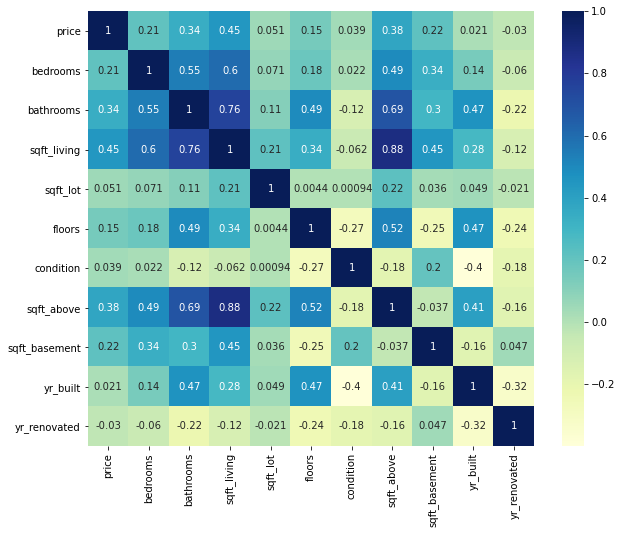

In [169]:
# tampilan korelasi dalam diagram heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")

In [170]:
# terlihat bahwa 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', dan 'sqft_basement'
# yg memiliki korelasi paling besar terhadap kolom 'price'. sedangkan..
# kolom 'sqft_lot', 'condition', 'yr_built', dan 'yr_renovated' 
# memiliki korelasi yg sangat rendah dengan kolom 'price'.
# ke-empat kolom tsb bisa kita hilangkan atau tidak juga gak masalah, katakanlah kita hilangkan 'yr_renovated'
dataset.drop(['yr_renovated'], axis=1, inplace=True)
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.396131,2.155968,2131.578809,1.483460e+04,1.511651,3.449549,1821.291932,310.286876,1970.787206
std,5.638915e+05,0.901988,0.775205,955.234941,3.597114e+04,0.537794,0.675242,853.292493,462.043404,29.763891
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,1900.000000
25%,3.261000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,3.000000,1590.000000,0.000000,1976.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097000e+04,2.000000,4.000000,2300.000000,600.000000,1997.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,5.000000,9410.000000,4820.000000,2014.000000


In [195]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x = dataset.bedrooms, y = dataset.price)

NameError: name 'bedrooms' is not defined

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

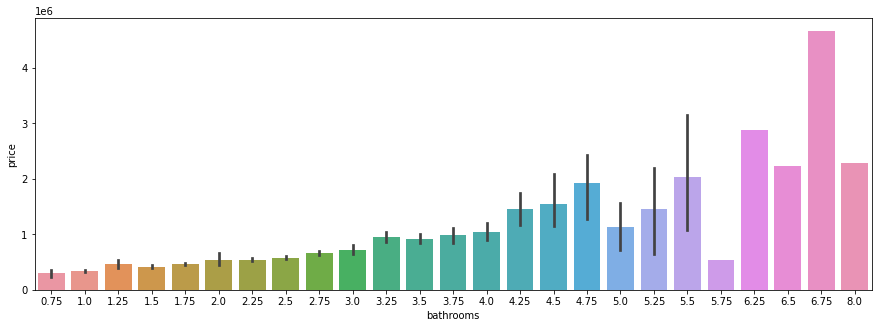

In [172]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x = dataset.bathrooms, y = dataset.price)

In [173]:
# test score akurasi model menggunakan raw data
y = dataset[['price']]
X = dataset.drop(['price'], axis=1)

train_X, test_X, train_y, test_y= train_test_split(X,y, test_size=0.3, random_state=0)

regr = LinearRegression()

regr.fit(train_X,train_y)

regr.score(train_X, train_y)*100

18.2919041125307

In [174]:
# Hasilnya masih sangat rendah..
dataset = dataset.reset_index()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          4549 non-null   int64  
 1   price          4549 non-null   float64
 2   bedrooms       4549 non-null   float64
 3   bathrooms      4549 non-null   float64
 4   sqft_living    4549 non-null   int64  
 5   sqft_lot       4549 non-null   int64  
 6   floors         4549 non-null   float64
 7   condition      4549 non-null   int64  
 8   sqft_above     4549 non-null   int64  
 9   sqft_basement  4549 non-null   int64  
 10  yr_built       4549 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 391.1 KB


In [175]:
dataset.shape

(4549, 11)

In [176]:
# buat variable independent
X = dataset.drop(['price'], axis=1)
X.shape

(4549, 10)

In [177]:
# buat variable dependent/target prediksi
y = dataset[['price']]

In [178]:
# split/pecah data menjadi data training yg akan digunakan untuk membuat model validasi dan prediksi
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.1, random_state=42)

print(len(X_train) / len(dataset))

0.8999780171466256


In [179]:
# pisah data yg tersisa menjadi data untuk validasi dan data untu testing/evaluasi
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

print(len(X_test)/len(X_rem))

0.5010989010989011


In [180]:
# cukup signifikan 0.5 bisa digunakan 
# buat model regressi trainingnya
lregr = LinearRegression()

# fit data training ke dalam model 
lregr.fit(X_train, y_train)

LinearRegression()

In [181]:
# buat prediksi dengan data validasi menggunakan model training tadi
y_pred = lregr.predict(X_valid) 

In [182]:
# validasi hasil prediksi dengan menghitung rata-rata kemungkinan error/kesalahan
rsqrmse = np.sqrt(mean_squared_error(y_pred, y_valid))
rsqrmse

225212.56871035023

In [183]:
y_valid

,price
1818,7.180000e+05
4121,3.250000e+05
3130,3.000000e+05
2067,6.000000e+05
2651,5.450000e+05
...,...
2661,1.008000e+06
4412,4.849917e+05
831,5.400000e+05
1126,6.550000e+05


In [184]:
y_pred

array([[ 274355.71301991],
       [ 228753.94582348],
       [ 385035.79387811],
       [ 594075.61959633],
       [ 505868.45464017],
       [ 545377.35439875],
       [ 477010.87153247],
       [ 595315.27023896],
       [ 221883.80477631],
       [ 332218.60852468],
       [ 697234.0727539 ],
       [ 996469.3470331 ],
       [ 417300.23591466],
       [ 967327.28716004],
       [ 255878.14762039],
       [ 212080.81747199],
       [ 537324.75312932],
       [ 437388.62131326],
       [ 710065.23698155],
       [ 391395.31193197],
       [ 338678.0081104 ],
       [ 628322.37409285],
       [ 860904.33018193],
       [ 419254.14580977],
       [ 584344.72549039],
       [ 411170.69703039],
       [ 449394.03723642],
       [ 565220.75459462],
       [ 766886.0454241 ],
       [ 268976.66556595],
       [ 343408.01462154],
       [ 814473.51075655],
       [ 864790.98415986],
       [ 700671.42951263],
       [ 648684.45459598],
       [ 676967.56849217],
       [ 637047.2427117 ],
 

In [185]:
# buat prediksi dengan data testing menggunakan model sebelumnya
y_prtest = lregr.predict(X_test) 

In [186]:
# validasi hasil prediksi dengan menghitung rata-rata kemungkinan error/kesalahan
rsqrmse = np.sqrt(mean_squared_error(y_prtest, y_test))
rsqrmse

308160.9261869909

In [187]:
# 
lregr.score(X_test, y_test)*100

60.870566042395126

In [188]:
# DecisionTree
dtregr = DecisionTreeRegressor(random_state=42, max_depth=5)

dtregr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [189]:
dtregr.score(X_test, y_test)*100

52.59192848234247

In [190]:
#Bagusan score yg lregr hehehe


In [191]:
#y_dtpred = dtregr.predict(X_test)
#y_dtpred
dataset_smry = ols('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + condition + yr_built', dataset).fit()
dataset_smry.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     187.6
Date:                Fri, 26 Mar 2021   Prob (F-statistic):          5.35e-245
Time:                        09:57:38   Log-Likelihood:                -66117.
No. Observations:                4549   AIC:                         1.323e+05
Df Residuals:                    4541   BIC:                         1.323e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.328e+06   6.25e+05      8.524      0.000     4.1e+06    6.55e+06
bedrooms    -7.012e+04   1.05e+04     -6.671      0.000   -9.07e+04   -4.95e+04
bathrooms     7.26e+04   1.71e+04      4.257      0.000    3.92e+04    1.06e+05
sqft_living   281.7692     13.003     21.670      0.000     256.277     307.261
sqft_lot       -0.7283      0.211     -3.448      0.001      -1.142      -0.314
floors       3.902e+04   1.68e+04      2.320      0.020    6048.318     7.2e+04
condition    2.973e+04   1.21e+04      2.461      0.014    6044.686    5.34e+04
yr_built    -2760.3589    315.340     -8.754      0.000   -3378.579   -2142.138
==============================================================================
Omnibus:                    12828.446   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        629799441.376
Skew:                          36.469   Prob(JB):                         0.00
Kurtosis:                    1824.381   Cond. No.                     3.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""